# 调用sklearn包

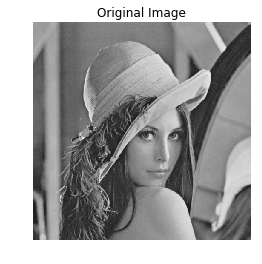

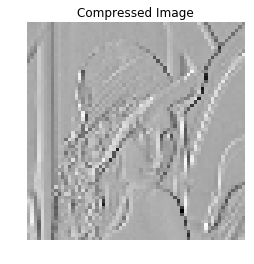

In [169]:
import numpy as np
from PIL import Image
import os,glob
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#原始图像
image = Image.open('Lena.jpg')
image = image.convert('L') 
plt.axis('off')
plt.imshow(image)
plt.title("Original Image")
plt.show()

matrix = np.array(image)
newData = np.zeros((64,64,64))

for i in range(0,64):
    for j in range(0,64):
        newData[i][j] = matrix[8*i:8*i+8,8*j:8*j+8].reshape(64)

for i in range(0,64):
    for j in range(0,64):
        newData[i][j] = newData[i][j] - np.mean(newData[i][j])
Data = newData.reshape(4096,64)

#提取主成分
pca=PCA(n_components=1)
DataPCA=pca.fit_transform(Data)
transData = DataPCA.reshape(64,64)

#显示图像
plt.imshow(transData.reshape(64, 64), cmap='Greys', interpolation='nearest')
plt.axis('off')
plt.title("Compressed Image")
plt.show()

# Oja's Algorithm - 初始化权重


In [242]:
X = Data[0].reshape(64,1)
R = np.random.rand(64,1)
W = R
print W

[[0.69070917]
 [0.33254268]
 [0.72693947]
 [0.31271685]
 [0.62893853]
 [0.2065456 ]
 [0.16301476]
 [0.71405137]
 [0.27657014]
 [0.00306254]
 [0.95372786]
 [0.88688973]
 [0.3418189 ]
 [0.92824619]
 [0.33627538]
 [0.6472369 ]
 [0.11786141]
 [0.17100996]
 [0.15466199]
 [0.91248679]
 [0.09996368]
 [0.0214006 ]
 [0.28147955]
 [0.75903988]
 [0.14733679]
 [0.98696695]
 [0.61619731]
 [0.28033101]
 [0.50776468]
 [0.14296834]
 [0.97147404]
 [0.74019118]
 [0.37144273]
 [0.84953106]
 [0.21943406]
 [0.22529043]
 [0.03340237]
 [0.15578467]
 [0.94553502]
 [0.29791836]
 [0.14471566]
 [0.60222993]
 [0.63788505]
 [0.71681054]
 [0.68135197]
 [0.62214892]
 [0.62995066]
 [0.31006403]
 [0.28328891]
 [0.05077775]
 [0.12901368]
 [0.30249916]
 [0.41601846]
 [0.15162099]
 [0.21754223]
 [0.84148277]
 [0.96597831]
 [0.17939288]
 [0.10815889]
 [0.3186345 ]
 [0.79009989]
 [0.8134045 ]
 [0.97022344]
 [0.59896992]]


# Oja's Algorithm - 使权值收敛到1

In [243]:
u = 0.001
init =  0
while 1:
    Y = np.matmul(W.reshape(1,64), X)
    W = W + u*( Y*X -Y*Y*W)
    print np.sqrt(sum(sum(W**2)))
    if init ==  np.sqrt(sum(sum(W**2))):
        break
        print np.sqrt(sum(sum(W**2)))
    init = np.sqrt(sum(sum(W**2)))

4.358884929172928
4.212741248053036
3.949794322453993
3.5140036154450005
2.889864074992154
2.1836006484924155
1.6028506658290156
1.2592688504081877
1.1005048752219928
1.037010546889255
1.013337345900541
1.0047662644582218
1.0016979189943866
1.0006041393102159
1.0002148605470287
1.0000764005142784
1.000027164564565
1.0000096581707831
1.0000034338437926
1.000001220852332
1.0000004340544855
1.0000001543208512
1.0000000548661625
1.000000019506725
1.0000000069352804
1.0000000024657194
1.0000000008766439
1.0000000003116756
1.000000000110811
1.000000000039397
1.0000000000140068
1.0000000000049798
1.0000000000017706
1.0000000000006295
1.0000000000002236
1.0000000000000795
1.0000000000000282
1.00000000000001
1.0000000000000036
1.0000000000000013
1.0000000000000004
1.0
1.0000000000000002
1.0
1.0


In [244]:
print W

[[-0.09253779]
 [-0.09253779]
 [-0.09253779]
 [-0.04276957]
 [-0.09253779]
 [ 0.20607155]
 [-0.14230601]
 [ 0.00699866]
 [-0.09253779]
 [-0.09253779]
 [-0.09253779]
 [-0.04276957]
 [-0.09253779]
 [ 0.20607155]
 [-0.14230601]
 [ 0.00699866]
 [-0.09253779]
 [-0.09253779]
 [-0.09253779]
 [-0.04276957]
 [-0.09253779]
 [ 0.20607155]
 [-0.14230601]
 [ 0.00699866]
 [-0.09253779]
 [-0.09253779]
 [-0.09253779]
 [-0.04276957]
 [-0.09253779]
 [ 0.20607155]
 [-0.14230601]
 [ 0.00699866]
 [-0.09253779]
 [-0.09253779]
 [-0.09253779]
 [-0.04276957]
 [-0.09253779]
 [ 0.20607155]
 [-0.14230601]
 [ 0.00699866]
 [-0.19207424]
 [-0.19207424]
 [ 0.15630333]
 [ 0.25583977]
 [-0.04276957]
 [ 0.05676688]
 [ 0.1065351 ]
 [ 0.05676688]
 [ 0.00699866]
 [ 0.00699866]
 [-0.14230601]
 [ 0.1065351 ]
 [ 0.00699866]
 [-0.04276957]
 [ 0.05676688]
 [ 0.25583977]
 [ 0.1065351 ]
 [ 0.1065351 ]
 [ 0.25583977]
 [ 0.20607155]
 [ 0.1065351 ]
 [ 0.1065351 ]
 [ 0.20607155]
 [ 0.15630333]]


# 压缩图像

[[-9.45730960e-106]
 [-2.84462298e-106]
 [-2.71212758e-106]
 ...
 [-1.38336810e-105]
 [ 1.23136452e-105]
 [ 2.73869986e-105]]


Text(0.5,1,'Compressed Image')

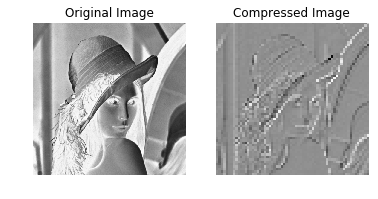

In [290]:
myData = Data
result = np.zeros((4096,1))
for i in range(0,4096):
    pca = np.matmul(W.reshape(1,64),myData[i])
    result[i] = pca
print result



plt.subplot(1,2,1)
plt.imshow(matrix.reshape(512,512), cmap='Greys', interpolation='nearest')
plt.axis('off')
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(result.reshape(64, 64), cmap='Greys', interpolation='nearest')
plt.axis('off')
plt.title("Compressed Image")